(0, '0.176*"cloth" + 0.099*"coat" + 0.080*"face" + 0.078*"overcoat" + 0.076*"suit"')<br>
(1, '0.778*"celebr" + 0.022*"produc" + 0.021*"cup" + 0.018*"food" + 0.014*"mountain"')<br>
(2, '0.342*"text" + 0.280*"celebr" + 0.073*"carpet" + 0.071*"red" + 0.071*"premier"')<br>
(3, '0.098*"hair" + 0.096*"food" + 0.065*"afro" + 0.065*"hairstyl" + 0.064*"hat"')<br>
(4, '0.226*"plant" + 0.135*"flora" + 0.095*"jar" + 0.094*"potteri" + 0.093*"vase"')<br>
(5, '0.159*"furnitur" + 0.117*"text" + 0.081*"chair" + 0.071*"couch" + 0.048*"trademark"')<br>
(6, '0.189*"build" + 0.131*"hous" + 0.066*"architectur" + 0.050*"text" + 0.045*"town"')<br>
(7, '0.127*"outdoor" + 0.099*"natur" + 0.079*"water" + 0.058*"sea" + 0.054*"ocean"')<br>
(8, '0.157*"room" + 0.100*"indoor" + 0.074*"furnitur" + 0.073*"design" + 0.073*"interior"')<br>
(9, '0.107*"vehicl" + 0.094*"transport" + 0.079*"car" + 0.075*"danc" + 0.069*"automobil"')<br>
(10, '0.100*"text" + 0.079*"music" + 0.072*"cosmet" + 0.049*"perform" + 0.045*"art"')<br>
(11, '0.154*"text" + 0.144*"poster" + 0.084*"collag" + 0.083*"paper" + 0.056*"flyer"')<br>
(12, '0.093*"cloth" + 0.091*"text" + 0.065*"footwear" + 0.058*"glass" + 0.053*"shoe"')<br>
(13, '0.202*"femal" + 0.190*"woman" + 0.190*"girl" + 0.165*"blond" + 0.106*"celebr"')<br>
(14, '0.280*"human" + 0.280*"person" + 0.274*"peopl" + 0.070*"text" + 0.019*"crowd"')]<br><br>
Brought to you by Natalie Olivo
<a href = https://www.linkedin.com/in/natalie-olivo-82548951/>LinkedIn</a>
<a href = https://nmolivo.github.io/NMOstatic/>Website</a>
<a href = https://medium.com/@NatalieOlivo>Blog</a>
<a href = https://github.com/nmolivo>GitHub</a>


In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
maven = pd.read_csv('all_data_feats_eng.csv')

In [3]:
maven.columns

Index(['Unnamed: 0', 'brand', 'engagement', 'favorite_count', 'hashtags', 'id',
       'img', 'img_class', 'impact', 'link_thumbnail', 'link_title',
       'media_url', 'retweet_count', 'text', 'timestamp', 'tweet_url', 'type',
       '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', 'brand_name', 'hour', 'weekday',
       'month', 'uploaded_media', 'text_only', 'question', 'has_hashtag'],
      dtype='object')

In [4]:
model_df = maven[['engagement', 'brand_name', 'uploaded_media', 'text_only', 'hour', 'weekday', 
                  'month', 'question', 'has_hashtag', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0',
                  '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0']]

#### When making dummy/categorical variables, one from each has to be dropped. This will act as our baseline. These can be chosen however you like.

#### For example: If we drop Sunday, you would interpret the result for Monday as "result" times as likely as Sunday to have an egagement above the median.

In [5]:
model_df = model_df.join(pd.get_dummies(model_df.hour, prefix='hour')).drop('hour_16', 1)
model_df = model_df.join(pd.get_dummies(model_df.month, prefix='month')).drop('month_5', 1)
model_df = model_df.join(pd.get_dummies(model_df.weekday)).drop('Sunday', 1)

In [6]:
# Set target here
target = np.median(model_df.engagement)
model_df['target'] = model_df.engagement.apply(lambda x: 1 if x > target else 0)

In [7]:
model_df = model_df.drop(['engagement', 'brand_name', 'hour', 
                          'weekday', 'month'], 1)

In [8]:
model_df.columns

Index(['uploaded_media', 'text_only', 'question', 'has_hashtag', '0.0', '1.0',
       '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0',
       '12.0', '13.0', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'Friday', 'Monday',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'target'],
      dtype='object')

In [9]:
len(model_df)

10000

In [10]:
model_df = model_df.dropna()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(model_df.drop('target', 1), model_df['target'], test_size=0.3, random_state=42)

In [12]:
log = LogisticRegression(class_weight='balanced')
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Evaluate the model

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

def eval_sklearn_model(y_true, predictions, model=None, X=None):
    """This function takes the true values for y and the predictions made by the model and prints out the confusion matrix along with Accuracy, Precision, and, if model and X provided, Roc_Auc Scores."""
    cnf_matrix = confusion_matrix(y_true, predictions)

    print('True Negative: ', cnf_matrix[0, 0], '| False Positive: ', cnf_matrix[0, 1])
    print('False Negative: ', cnf_matrix[1, 0], '| True Positive: ', cnf_matrix[1, 1], '\n')

    sensitivity = cnf_matrix[1, 1]/ (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    specificity = cnf_matrix[0, 0]/ (cnf_matrix[0, 1] + cnf_matrix[0, 0])

    print('Sensitivity (TP/ TP + FN): ', sensitivity)
    print('Specificity (TN/ TN + FP): ', specificity, '\n')

    print('Accuracy: ', accuracy_score(y_true, predictions, normalize=True))
    print('Precision: ', precision_score(y_true, predictions))
    if model != None:
        print('Roc-Auc: ', roc_auc_score(y_true, [x[1] for x in model.predict_proba(X)]))
    else:
        pass
    print('\n')

In [14]:
predictions = log.predict(X_test)
eval_sklearn_model(y_test, predictions, model=log, X=X_test)

True Negative:  871 | False Positive:  494
False Negative:  607 | True Positive:  804 

Sensitivity (TP/ TP + FN):  0.56980864635
Specificity (TN/ TN + FP):  0.638095238095 

Accuracy:  0.603386167147
Precision:  0.619414483821
Roc-Auc:  0.644007445425




In [15]:
coefficients = pd.concat([pd.DataFrame(model_df.columns),pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coefficients.columns = ['label', 'value']
coefficients['odds'] = coefficients.value.apply(lambda x: math.exp(x))
coefficients.sort_values('odds', ascending=False).head(25)

,label,value,odds
10,6.0,1.244157,3.470010
11,7.0,1.204802,3.336099
12,8.0,0.573991,1.775338
3,has_hashtag,0.545472,1.725423
8,4.0,0.456220,1.578097
43,month_3,0.415098,1.514519
41,month_1,0.395251,1.484757
20,hour_2,0.378844,1.460595
21,hour_3,0.342570,1.408562
13,9.0,0.337974,1.402103


In [16]:
coefficients.sort_values('odds', ascending=False).tail(25)

,label,value,odds
29,hour_11,-0.006090,0.993928
45,month_6,-0.026385,0.973960
56,Tuesday,-0.039855,0.960929
54,Saturday,-0.041755,0.959105
7,3.0,-0.054999,0.946486
14,10.0,-0.076458,0.926392
2,question,-0.092163,0.911957
53,Monday,-0.099292,0.905478
28,hour_10,-0.126728,0.880974
46,month_7,-0.129808,0.878264


### Pre-process Tweet Text

In [17]:
# Instantiate tokenizer to break text into lists of words
tokenizer = RegexpTokenizer(r'\w+')
# Instantiate lemmatizer to turn plural words into singular for better comparison
lemmatizer = WordNetLemmatizer()

In [18]:
# First let's turn each title into a list of words
maven['nlp_text'] = maven.text.apply(lambda x: tokenizer.tokenize(x.lower()))

In [19]:
# Then we'll use the lemmatizer to change plurals to singulars to group them
maven.nlp_text = maven.nlp_text.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [20]:
# And rejoin the lists of words to one string for the count vectorizer
maven.nlp_text = maven.nlp_text.apply(lambda x: ' '.join(x))

### Pre-process Link Title Text

In [21]:
maven.columns

Index(['Unnamed: 0', 'brand', 'engagement', 'favorite_count', 'hashtags', 'id',
       'img', 'img_class', 'impact', 'link_thumbnail', 'link_title',
       'media_url', 'retweet_count', 'text', 'timestamp', 'tweet_url', 'type',
       '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', 'brand_name', 'hour', 'weekday',
       'month', 'uploaded_media', 'text_only', 'question', 'has_hashtag',
       'nlp_text'],
      dtype='object')

In [22]:
maven.link_title = maven.link_title.fillna('')
maven['nlp_link_title'] = maven.link_title.apply(lambda x: tokenizer.tokenize(x.lower()))
maven.nlp_link_title = maven.nlp_link_title.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
maven.nlp_link_title = maven.nlp_link_title.apply(lambda x: ' '.join(x))

### Create Stop Words

In [23]:
# Use nltk's english stop words
stopWords = set(stopwords.words('english'))
print(stopWords)

{'won', 'yourself', 'in', 'any', 'we', 'herself', 'where', 'them', 'once', 'some', 'been', 'here', 'my', 'has', 'i', 'through', 'our', 'her', 'against', 'why', 'doesn', 'your', 'have', 'who', 'needn', 'nor', 'him', 'than', 'hers', 's', 'that', 'too', 'during', 'own', 'theirs', 'yourselves', 'shan', 'whom', 'below', 'and', 'under', 'up', 'few', 're', 'over', 'how', 'should', 'himself', 'being', 'just', 'by', 'which', 'd', 'ain', 'an', 'very', 'm', 'isn', 'weren', 'for', 'each', 'its', 'o', 'the', 'until', 'did', 'yours', 'had', 'themselves', 'will', 'this', 'mustn', 'down', 'further', 'but', 'then', 'same', 'hadn', 'so', 'what', 'does', 'above', 'am', 'from', 'if', 'into', 'other', 'myself', 'about', 'these', 'didn', 'me', 'can', 'were', 'when', 'shouldn', 'his', 'a', 'don', 'ourselves', 'to', 'no', 'ours', 'are', 'is', 'while', 'out', 'most', 'ma', 'she', 'both', 'after', 'doing', 'because', 'of', 'off', 'again', 'now', 've', 'was', 'more', 'such', 'itself', 'mightn', 'at', 'or', 'll',

In [24]:
# Add attitional stopwords as needed
stopWords.update(['http', 'wa', 'ha', 'co'])
# was gets shortened to wa and has to ha by the lemmatizer

### Rebuild model_df to keep brand_name and engagement columns

In [25]:
model_df = maven.drop(['Unnamed: 0', "img", 'brand', 'id', 'impact', 'timestamp', 'type', 'link_title', 'hashtags', 'text', 'tweet_url', 'link_thumbnail', 'retweet_count', 'img_class', 'favorite_count', 'media_url'], 1)
model_df = model_df.join(pd.get_dummies(model_df.hour, prefix='hour')).drop('hour_16', 1)
model_df = model_df.join(pd.get_dummies(model_df.month, prefix='month')).drop('month_5', 1)
model_df = model_df.join(pd.get_dummies(model_df.weekday)).drop('Sunday', 1)
target = np.median(model_df.engagement)
model_df['target'] = model_df.engagement.apply(lambda x: 1 if x > target else 0)
model_df = model_df.drop(['hour', 'weekday', 'month'], 1)

In [26]:
model_df.dropna(inplace=True)

### Logistic Regression by Brand

In [27]:
def log_reg_coef(brand, data):
    data = data[data.brand_name==brand].copy()
    target = np.median(data.engagement)
    data.target = data.engagement.apply(lambda x: 1 if x > target else 0)
    print('Median engagement for ', brand, ' is ', target, '.\n')
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['target', 'engagement', 'brand_name'], 1), data['target'], test_size=0.3, random_state=42)
    
    # link_title text
    cvec = CountVectorizer(stop_words=stopWords, ngram_range=(1,2), max_features=1000)
    cvec.fit(X_train.nlp_link_title, y_train)
    cvec_df  = pd.DataFrame(cvec.transform(X_train.nlp_link_title).todense(), columns=cvec.get_feature_names()) 
    cvec_df.index = X_train.index
    cvec_df.columns += " _link_title_"
    X_train = X_train.join(cvec_df).drop('nlp_link_title',1)
    test_cvec_df  = pd.DataFrame(cvec.transform(X_test.nlp_link_title).todense(), columns=cvec.get_feature_names())
    test_cvec_df.index = X_test.index
    test_cvec_df.columns += " _link_title_"
    X_test = X_test.join(test_cvec_df).drop('nlp_link_title',1)

    # tweet text
    cvec = CountVectorizer(stop_words=stopWords, ngram_range=(1,2), max_features=1000)
    cvec.fit(X_train.nlp_text, y_train)
    cvec_df  = pd.DataFrame(cvec.transform(X_train.nlp_text).todense(), columns=cvec.get_feature_names()) 
    cvec_df.index = X_train.index
    cvec_df.columns += " ___tweet____"
    X_train = X_train.join(cvec_df).drop('nlp_text',1)
    test_cvec_df  = pd.DataFrame(cvec.transform(X_test.nlp_text).todense(), columns=cvec.get_feature_names())
    test_cvec_df.index = X_test.index
    test_cvec_df.columns += " ___tweet____"
    X_test = X_test.join(test_cvec_df).drop('nlp_text',1)

    log = LogisticRegression(class_weight='balanced')
    log.fit(X_train, y_train)
    predictions = log.predict(X_test)
    print('Evaluation for brand: ', brand, '\n')
    eval_sklearn_model(y_test, predictions, model=log, X=X_test)
    
    coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(log.coef_))], axis = 1)
    coefficients.columns = ['label', 'value']
    coefficients['odds'] = coefficients.value.apply(lambda x: math.exp(x))
    return coefficients

In [28]:
model_df.head()

,engagement,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,month_10,month_11,month_12,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,target
0,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
4,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
model_df.columns

Index(['engagement', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0',
       '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', 'brand_name',
       'uploaded_media', 'text_only', 'question', 'has_hashtag', 'nlp_text',
       'nlp_link_title', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'Friday', 'Monday',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'target'],
      dtype='object')

In [30]:
model_df[model_df.isnull().any(axis=1)]

,engagement,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,month_10,month_11,month_12,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,target


In [31]:
print('For each brand, a model is built that predicts whether a tweet will receive above or below the median level of engagement.\nYou will see a score for each model evaluating its ability to predict this target.\nThen you will see the 25 best features and the 25 worst features.\nThe vast majority of features will be words from either the tweet itself or the link title.\nTo know how influenctial a feature or word is, use the odds column.\nA feature is "odds" times as likely to be above the median engagement.\n')
for brand in model_df.brand_name.unique():
    brand_coef = log_reg_coef(brand, model_df)
    print('25 best features for ', brand, '\n')
    print(brand_coef.sort_values('odds', ascending=False)[['label', 'odds']].head(25), '\n')
    print('25 worst features for ', brand, '\n')
    print(brand_coef.sort_values('odds', ascending=False)[['label', 'odds']].tail(25), '\n')
print('Job Done!')

For each brand, a model is built that predicts whether a tweet will receive above or below the median level of engagement.
You will see a score for each model evaluating its ability to predict this target.
Then you will see the 25 best features and the 25 worst features.
The vast majority of features will be words from either the tweet itself or the link title.
To know how influenctial a feature or word is, use the odds column.
A feature is "odds" times as likely to be above the median engagement.

Median engagement for  glamourmag  is  20.0 .

Evaluation for brand:  glamourmag 

True Negative:  124 | False Positive:  84
False Negative:  67 | True Positive:  97 

Sensitivity (TP/ TP + FN):  0.591463414634
Specificity (TN/ TN + FP):  0.596153846154 

Accuracy:  0.594086021505
Precision:  0.53591160221
Roc-Auc:  0.641445825516


25 best features for  glamourmag 

                        label      odds
41                    month_1  5.103514
44                    month_4  2.805137
43    

## Random Forest

In [32]:
model_df.head()

,engagement,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,month_10,month_11,month_12,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,target
0,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
4,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


# Random Forest

In [33]:
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from ipywidgets import *
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set_style('whitegrid')

%matplotlib inline

In [34]:
def log_reg_coef(brand, data):
    data = data[data.brand_name==brand].copy()
    target = np.median(data.engagement)
    data.target = data.engagement.apply(lambda x: 1 if x > target else 0)
    print('Median engagement for ', brand, ' is ', target, '.\n')
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['target', 'engagement', 'brand_name'], 1), data['target'], test_size=0.3, random_state=42)
    
    # link_title text
    cvec = CountVectorizer(stop_words=stopWords, ngram_range=(1,2), max_features=1000)
    cvec.fit(X_train.nlp_link_title, y_train)
    cvec_df  = pd.DataFrame(cvec.transform(X_train.nlp_link_title).todense(), columns=cvec.get_feature_names()) 
    cvec_df.index = X_train.index
    cvec_df.columns += " _link_title_"
    X_train = X_train.join(cvec_df).drop('nlp_link_title',1)
    test_cvec_df  = pd.DataFrame(cvec.transform(X_test.nlp_link_title).todense(), columns=cvec.get_feature_names())
    test_cvec_df.index = X_test.index
    test_cvec_df.columns += " _link_title_"
    X_test = X_test.join(test_cvec_df).drop('nlp_link_title',1)

    # tweet text
    cvec = CountVectorizer(stop_words=stopWords, ngram_range=(1,2), max_features=1000)
    cvec.fit(X_train.nlp_text, y_train)
    cvec_df  = pd.DataFrame(cvec.transform(X_train.nlp_text).todense(), columns=cvec.get_feature_names()) 
    cvec_df.index = X_train.index
    cvec_df.columns += " ___tweet____"
    X_train = X_train.join(cvec_df).drop('nlp_text',1)
    test_cvec_df  = pd.DataFrame(cvec.transform(X_test.nlp_text).todense(), columns=cvec.get_feature_names())
    test_cvec_df.index = X_test.index
    test_cvec_df.columns += " ___tweet____"
    X_test = X_test.join(test_cvec_df).drop('nlp_text',1)

    log = RandomForestClassifier(class_weight='balanced')
    log.fit(X_train, y_train)
    predictions = log.predict(X_test)
    print('Evaluation for brand: ', brand, '\n')
    eval_sklearn_model(y_test, predictions, model=log, X=X_test)
    
    coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(log.feature_importances_))], axis = 1)
    coefficients.columns = ['label', 'value']
    
    return coefficients

In [35]:
coef = log_reg_coef('wmag', model_df)

Median engagement for  wmag  is  20.0 .

Evaluation for brand:  wmag 

True Negative:  169 | False Positive:  61
False Negative:  85 | True Positive:  128 

Sensitivity (TP/ TP + FN):  0.600938967136
Specificity (TN/ TN + FP):  0.734782608696 

Accuracy:  0.670428893905
Precision:  0.677248677249
Roc-Auc:  0.724045723617




In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
coef.sort_values('value', ascending=False)

,label,value
14,uploaded_media,0.063331
21,hour_3,0.007372
67,2016 _link_title_,0.005935
52,Friday,0.005697
1,1.0,0.005653
53,Monday,0.005227
57,Wednesday,0.005208
1046,year _link_title_,0.005180
43,month_3,0.005081
449,gucci _link_title_,0.004898


In [38]:
x = model_df.drop(["engagement","nlp_link_title", "nlp_text", "brand_name",'target'], axis =1)
y = model_df.target

dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
x.columns

Index(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', 'uploaded_media', 'text_only',
       'question', 'has_hashtag', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'Friday',
       'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [40]:
list(x.columns)[14]

'uploaded_media'

In [41]:
list(x.columns)[16], list(x.columns)[6]

('question', '6.0')

In [42]:
list(x.columns)[17], list(x.columns)[45], list(x.columns)[17], list(x.columns)[49]

('has_hashtag', 'month_6', 'has_hashtag', 'month_10')

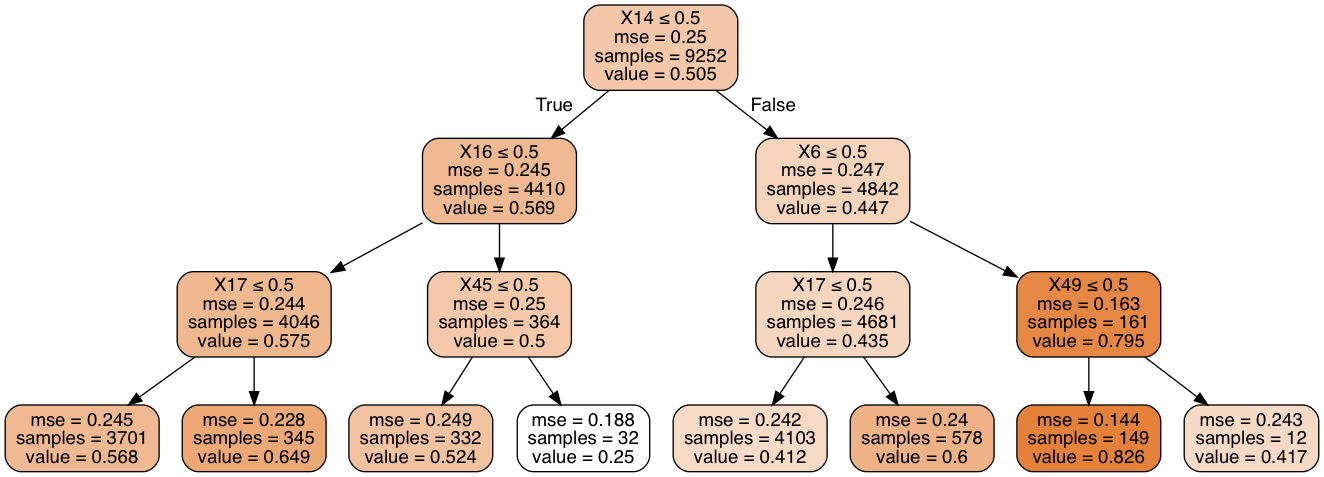

In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [44]:
model_df.columns

Index(['engagement', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0',
       '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', 'brand_name',
       'uploaded_media', 'text_only', 'question', 'has_hashtag', 'nlp_text',
       'nlp_link_title', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'Friday', 'Monday',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'target'],
      dtype='object')

In [45]:
model_df["brand_name"].unique()

array(['glamourmag', 'voguemagazine', 'wmag', 'VanityFair', 'CNTraveler',
       'SELFmagazine', 'ArchDigest', 'Allure_magazine', 'TeenVogue'], dtype=object)

In [46]:
def decisiontree_viz(brand, depth):
    #print(brand)
    df = model_df[model_df["brand_name"]==brand]
    x = df[['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0',
       '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', 'brand_name',
       'uploaded_media', 'text_only', 'question', 'has_hashtag']]
    y = df.target

    dtree = DecisionTreeRegressor(max_depth=depth)
    dtree.fit(x, y)
    
    dot_data = StringIO()  

    export_graphviz(dtree, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)  

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png()) 

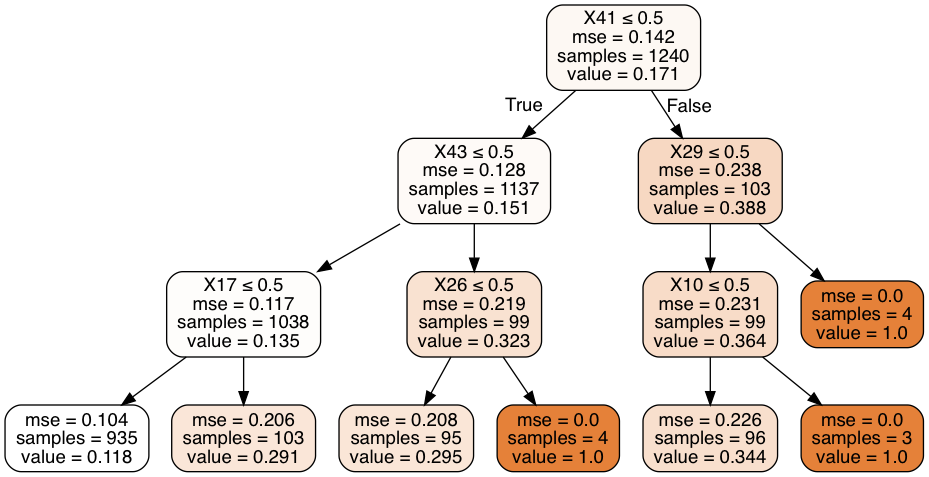

In [55]:
decisiontree_viz('glamourmag', 3)

In [64]:
print(list(x.columns)[41])
print(list(x.columns)[43], list(x.columns)[29])
print(list(x.columns)[17], list(x.columns)[26], list(x.columns)[10])

month_1
month_3 hour_11
has_hashtag hour_8 10.0


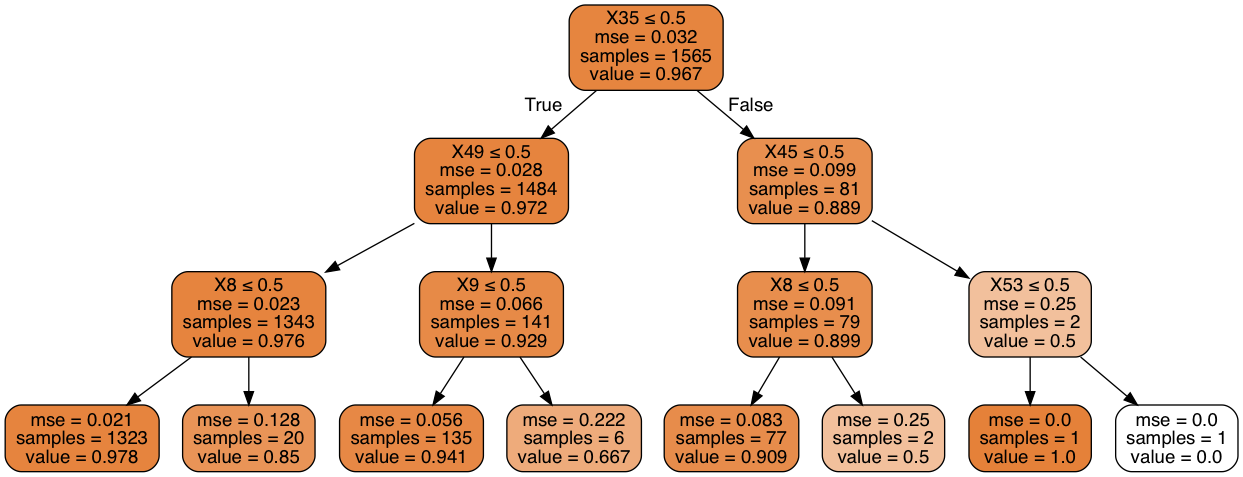

In [56]:
decisiontree_viz('voguemagazine', 3)

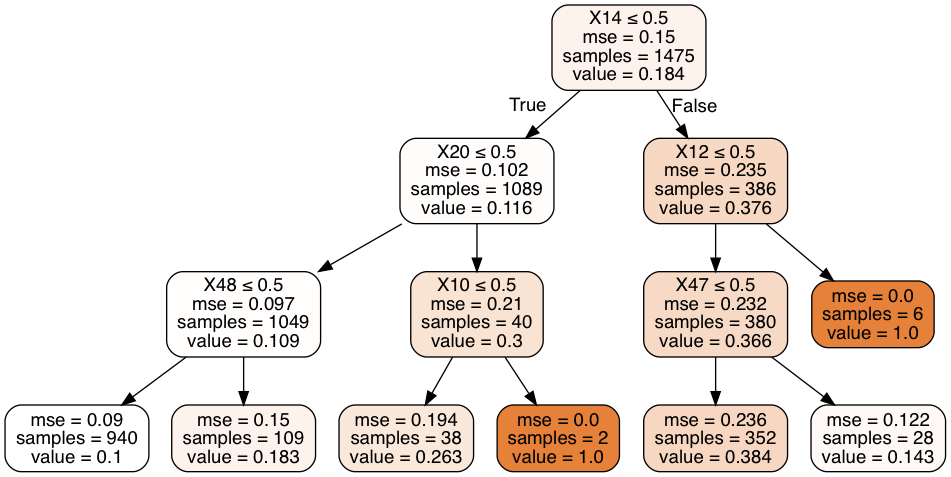

In [57]:
decisiontree_viz('wmag', 3)

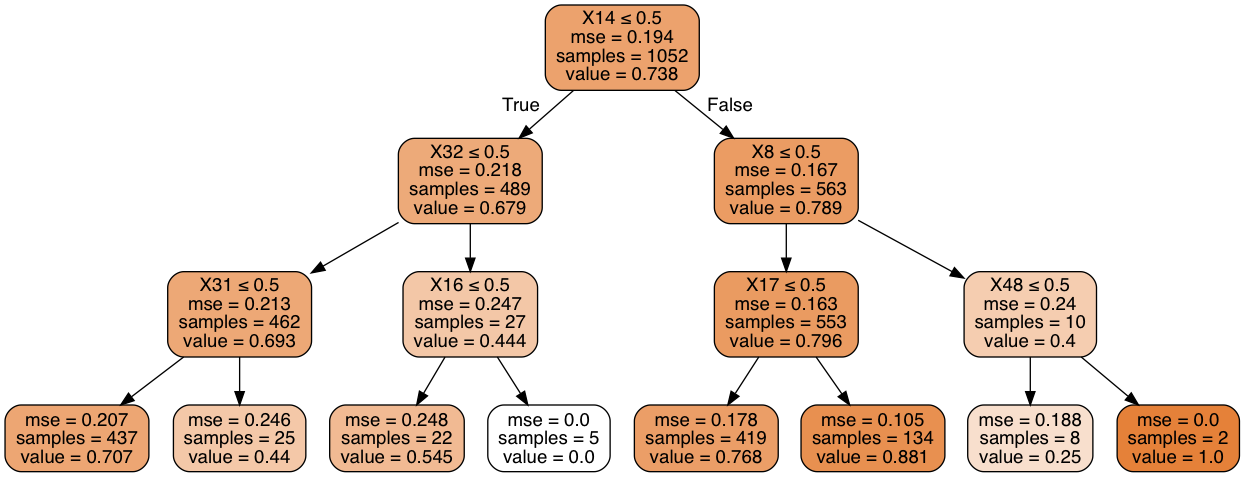

In [58]:
decisiontree_viz('VanityFair', 3)

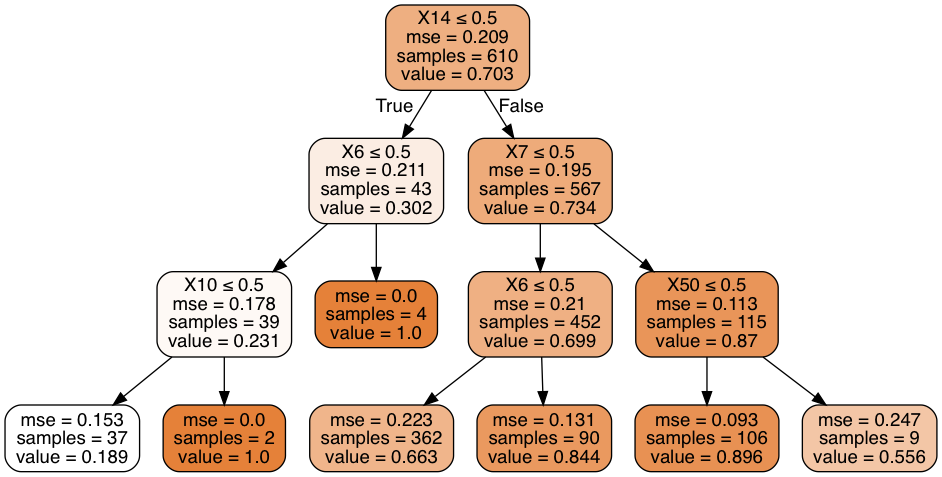

In [59]:
decisiontree_viz('CNTraveler', 3)

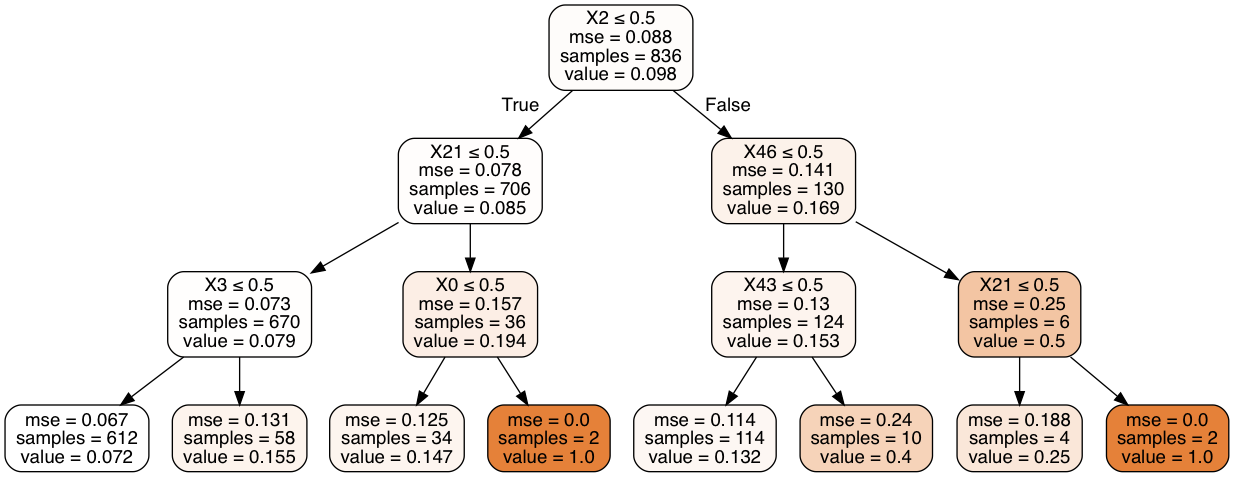

In [60]:
decisiontree_viz('SELFmagazine', 3)

In [65]:
print(list(x.columns)[2])
print(list(x.columns)[21], list(x.columns)[46])
print(list(x.columns)[3], list(x.columns)[0], list(x.columns)[43], list(x.columns)[21])

2.0
hour_3 month_7
3.0 0.0 month_3 hour_3


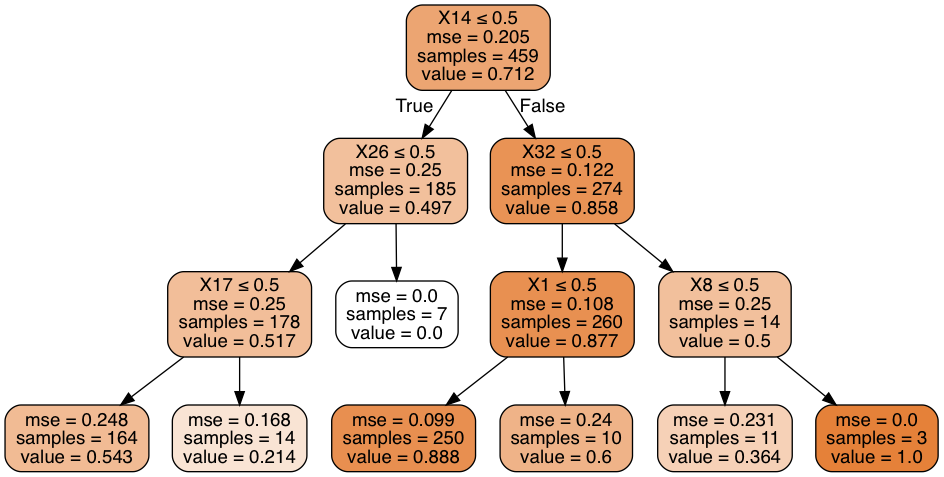

In [54]:
decisiontree_viz('ArchDigest', 3)

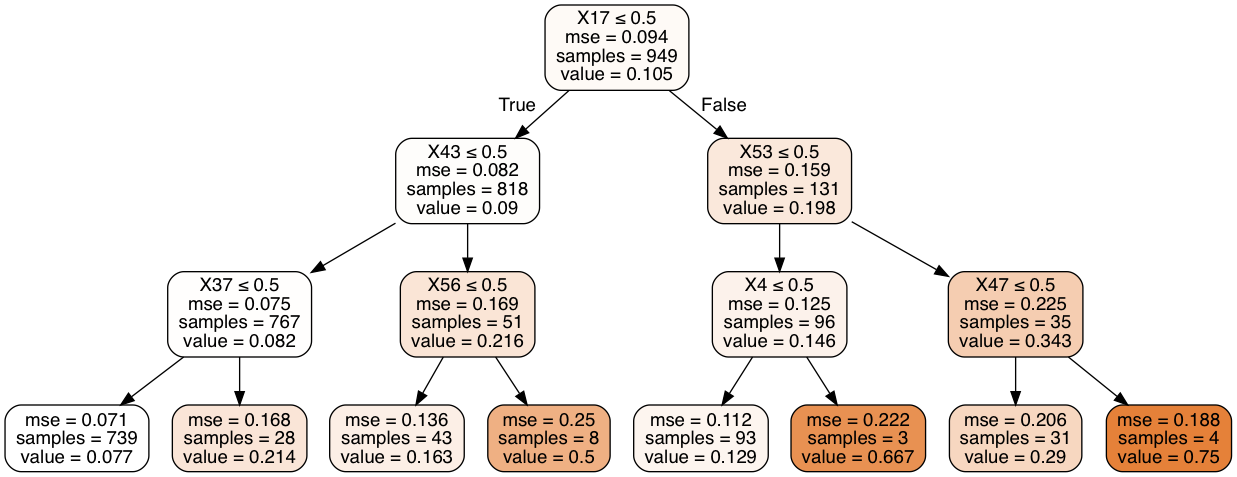

In [61]:
decisiontree_viz('Allure_magazine', 3)

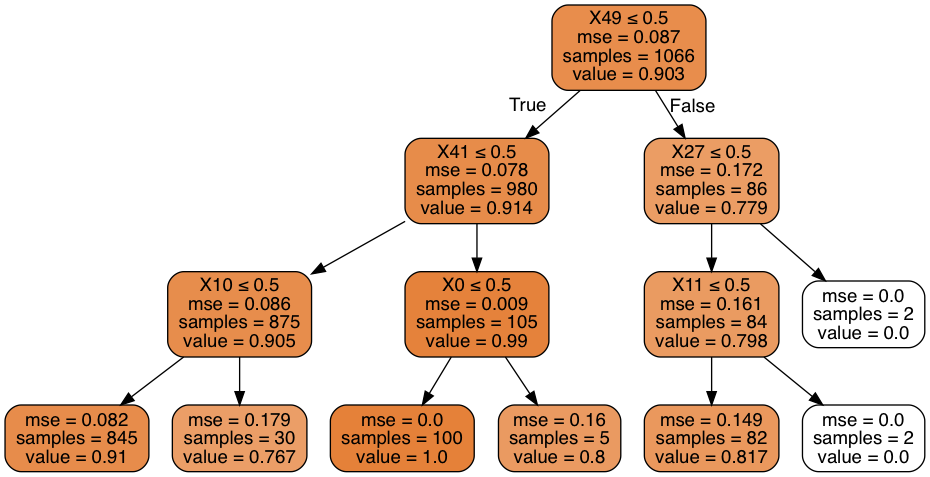

In [62]:
decisiontree_viz('TeenVogue', 3)